# Periodic Bspline

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 71437 bytes to pyBspline.py


## Dominio 1D, codominio 2D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=10 #base caridnality
xmin = 0.0
xmax = 1.0

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xmin,xmax,p=P,n=N)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

polinomial degree :  1
base caridnality  :  11
knots             :  [-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]


In [3]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
t = np.linspace(0,1,N)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [5]:
#bs.control_points()

In [6]:
#bs.periodicity()

In [7]:
#
NN = 1000
T = np.linspace(xmin,xmax,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

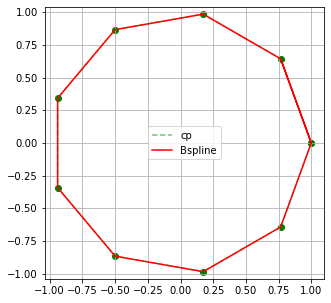

In [8]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
#plt.quiver( xy[index] , arrow[index] ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

In [9]:
der = bs.derivative()
arrow = der.evaluate(T)

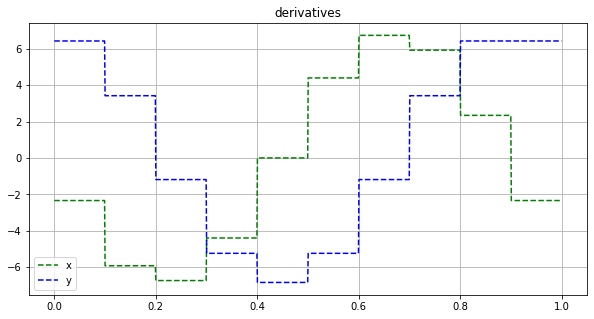

In [10]:
#grafico
plt.figure ( 0 , figsize = ( 10 , 5 ) )
   
#converto in dataframe    
plt.plot(T,arrow[:,0],color="green",label="x",linestyle="--",alpha=1)
plt.plot(T,arrow[:,1],color="blue",label="y",linestyle="--",alpha=1)
plt.legend()
plt.grid(True)
plt.title("derivatives")
plt.show()

## BEM

### Definition

In [49]:
k_in = np.asarray([10.0,0.0])
wavevector = np.sqrt(np.sum(np.power(k_in,2.0)))
I = np.complex(0,1)
def uinc(xx): # soluzione
    xx = np.asarray(xx)
    theta = np.dot(xx,k_in)
    return np.exp(I*theta)

xmin = -5
xmax = 5.
ymin = -2
ymax = 2

In [50]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=100 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

In [51]:
file_dir = "files/BEM/"
suffix = "P="+str(P)+"-N="+str(N)+"-k="+str(wavevector)+".csv"

In [52]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [53]:
t = np.linspace(0,1,N)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

### Geometry

In [54]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

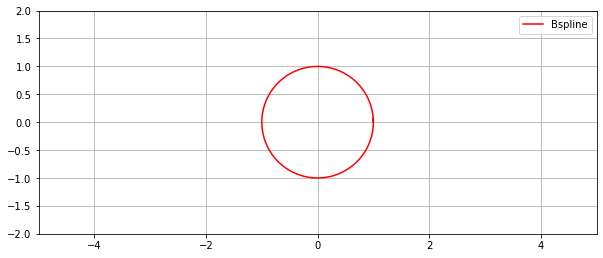

In [55]:
#grafico
fig = plt.figure ( 0 , figsize = ( 10, 5 ) )
   
#converto in dataframe    
ax = fig.add_subplot(111)
#plt.plot(cpx,cpy,color="green",label="cp",linestyle="--")
#plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
plt.grid()
plt.legend()
ax.set_aspect('equal')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

### Stiffness Matrix

In [56]:
file = file_dir+"stiffness_matrix/"+suffix
file

'files/BEM/stiffness_matrix/P=1-N=100-k=10.0.csv'

In [57]:
bs.load("sm-BEM",file)
sm = bs.stiffness_matrix_BEM(k=wavevector)
#bs.save("sm-BEM",file)
#sm

### Single Layer Potential basis

In [ ]:
x = np.linspace(0,1,3)
y = np.linspace(2,3,3)
 
xy = np.zeros((len(x),2))
xy[:,0] = x 
xy[:,1] = y
xy

In [59]:
Nx= int(xmax-xmin)*30
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))

#tolgo elementi interni
radius = np.asarray([np.sqrt(np.sum(np.power(i,2.0))) for i in XY])
XYslp = XY[radius > 1.0]
print(len(XYslp)," = ",len(XYslp)*3/3600,"h")

11072  =  9.226666666666667 h


In [60]:
file = file = file_dir+"single_layer_potential/"+suffix
file

'files/BEM/single_layer_potential/P=1-N=100-k=10.0.csv'

In [ ]:
#bs.load("slp-BEM",file)
slp = bs.single_layer_potential_basis_BEM(XY=XYslp,k=wavevector,opts={"print":True})
bs.save("slp-BEM",file)
slp

### Solution

In [ ]:
file = file = file_dir+"solution/"+suffix
file

In [ ]:
sol,Xnp,Valnp = bs.BEM(uinc=uinc,k=wavevector,XY=XYslp,opts=None)
sol.to_csv(file,index_label="index")

In [ ]:
#sol
#Xnp
Valnp.shape

### Grafici

In [ ]:
#
uinc_value = uinc(XY).reshape(Nx,Ny).transpose()

Ur = uinc_value.real
Ui = uinc_value.imag

In [ ]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

##################################
# u_inc
#Real
ax = fig.add_subplot(221)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.pcolormesh(X,Y,Ur,cmap="Blues")
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("$u_{inc}$ : real")

#################
#Imag
ax = fig.add_subplot(222)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.pcolormesh(X,Y,Ui,cmap="Blues")
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("$u_{inc}$ : imaginary")

##################################
# solution
#Real
ax = fig.add_subplot(223)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=Valnp.real)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("solution : real")

#################
#Imag
ax = fig.add_subplot(224)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=Valnp.imag)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("solution : imaginary")

##################################

plt.show()

- scelgo i punti in cui valutare la soluzione
- calcolo il valore della soluzione con $\psi_i$ al posto di $\psi$
- poi modificando $u_{inc}$ varierà $\psi$ ma potrò comunque sfrittare la matrice calcolata

- devo creare delle Bspline periodiche
- l'ultimo control points non deve essere accessibile
- devo modificare le funzioni di approssimazione
- devo togliere dalle matrici le righe che corrispondono ai dof periodici dopo aver sommato il loro contributo agli altri dof
- sistemare solo la funzione approximate per adesso

- approximate
- edge
- Dirichlet_BC
- Galerkin

cioè solo le funzioni che vanno a modificare i control points della Bspline

# Hankel and Bessel functions

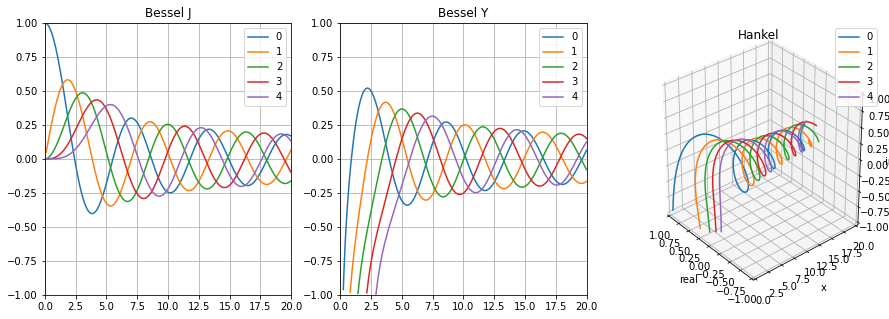

In [2]:
#
orders = [0,1,2,3,4]
t  = np.linspace(0.1,20,1000)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(131)  
for i in orders:
    B1 = scipy.special.jv(i,t)
    B1[B1<-1] = np.nan
    ax.plot(t, B1 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel J")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(132)  
for i in orders:
    B2 = scipy.special.yv(i,t)    
    B2[B2<-1] = np.nan
    ax.plot(t, B2 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel Y")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(133, projection='3d')  
for i in orders:
    H  = scipy.special.hankel1(i,t)
    Hr = H.real
    Hi = H.imag
    Hr[Hr<-1] = np.nan
    Hi[Hi<-1] = np.nan
    ax.plot(Hr, t, Hi ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Hankel")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,20)
ax.set_zlim3d(-1,1)
ax.set_xlabel( "real" )
ax.set_ylabel( "x" )
ax.set_zlabel( "imag" )
ax.invert_xaxis()
ax.view_init(elev=30, azim=-40)
plt.grid(True)
plt.legend()


#h = scipy.special.jv(i,t) + I*scipy.special.yv(i,t)
#H = scipy.special.hankel1(i,t)
#np.nanmean(np.absolute(h-H))

plt.show()